In [4]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
from tqdm import tqdm

Using device: cpu


Training:   5%|▌         | 1/20 [00:04<01:17,  4.09s/epoch]

Epoch 1/20, Loss: 0.035052


Training:  10%|█         | 2/20 [00:08<01:13,  4.10s/epoch]

Epoch 2/20, Loss: 0.032305


Training:  15%|█▌        | 3/20 [00:12<01:12,  4.24s/epoch]

Epoch 3/20, Loss: 0.027231


Training:  20%|██        | 4/20 [00:17<01:09,  4.34s/epoch]

Epoch 4/20, Loss: 0.024764


Training:  25%|██▌       | 5/20 [00:21<01:06,  4.42s/epoch]

Epoch 5/20, Loss: 0.026051


Training:  30%|███       | 6/20 [00:26<01:02,  4.48s/epoch]

Epoch 6/20, Loss: 0.026065


Training:  35%|███▌      | 7/20 [00:30<00:58,  4.52s/epoch]

Epoch 7/20, Loss: 0.029493


Training:  40%|████      | 8/20 [00:35<00:54,  4.56s/epoch]

Epoch 8/20, Loss: 0.022906


Training:  45%|████▌     | 9/20 [00:40<00:50,  4.58s/epoch]

Epoch 9/20, Loss: 0.022064


Training:  50%|█████     | 10/20 [00:44<00:45,  4.58s/epoch]

Epoch 10/20, Loss: 0.018514


Training:  55%|█████▌    | 11/20 [00:49<00:41,  4.59s/epoch]

Epoch 11/20, Loss: 0.024091


Training:  60%|██████    | 12/20 [00:53<00:36,  4.60s/epoch]

Epoch 12/20, Loss: 0.018513


Training:  65%|██████▌   | 13/20 [00:58<00:32,  4.62s/epoch]

Epoch 13/20, Loss: 0.022960


Training:  70%|███████   | 14/20 [01:03<00:27,  4.64s/epoch]

Epoch 14/20, Loss: 0.019829


Training:  75%|███████▌  | 15/20 [01:07<00:23,  4.66s/epoch]

Epoch 15/20, Loss: 0.024730


Training:  80%|████████  | 16/20 [01:12<00:18,  4.65s/epoch]

Epoch 16/20, Loss: 0.019024


Training:  85%|████████▌ | 17/20 [01:17<00:13,  4.65s/epoch]

Epoch 17/20, Loss: 0.021554


Training:  90%|█████████ | 18/20 [01:21<00:09,  4.64s/epoch]

Epoch 18/20, Loss: 0.022697


Training:  95%|█████████▌| 19/20 [01:26<00:04,  4.62s/epoch]

Epoch 19/20, Loss: 0.018550


Training: 100%|██████████| 20/20 [01:31<00:00,  4.55s/epoch]

Epoch 20/20, Loss: 0.022217


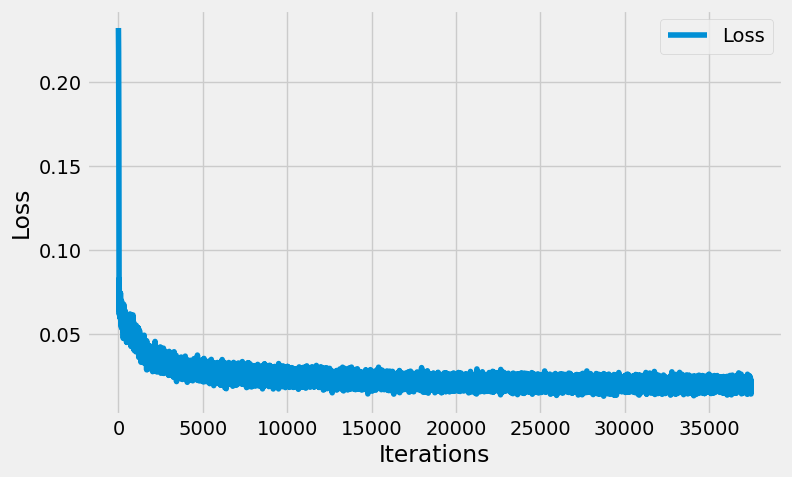

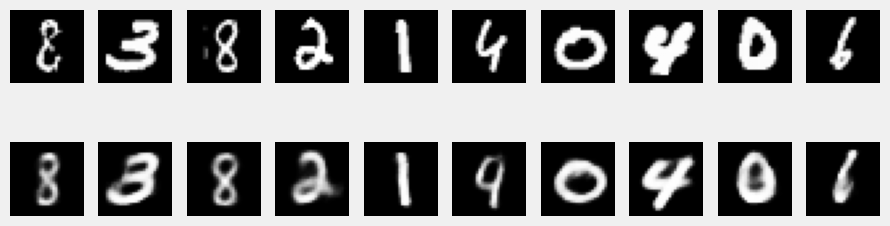

In [6]:
tensor_transform = transforms.ToTensor()
dataset = datasets.MNIST(
    root="./data", train=True, download=True, transform=tensor_transform
)
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, shuffle=True)


class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 36),
            nn.ReLU(),
            nn.Linear(36, 18),
            nn.ReLU(),
            nn.Linear(18, 9),
        )
        self.decoder = nn.Sequential(
            nn.Linear(9, 18),
            nn.ReLU(),
            nn.Linear(18, 36),
            nn.ReLU(),
            nn.Linear(36, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


# Initialize the model, loss function, and optimizer
model = AE()
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-8)

epochs = 20
outputs = []
losses = []

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"
print(f"Using device: {device}")
model.to(device)

for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    for images, _ in loader:
        images = images.view(-1, 28 * 28).to(device)

        reconstructed = model(images)
        loss = loss_function(reconstructed, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    outputs.append((epoch, images, reconstructed))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 5))
plt.plot(losses, label="Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Visualize the reconstructed images
model.eval()
dataiter = iter(loader)
images, _ = next(dataiter)

images = images.view(-1, 28 * 28).to(device)
reconstructed = model(images)

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 3))
for i in range(10):
    axes[0, i].imshow(images[i].cpu().detach().numpy().reshape(28, 28), cmap="gray")
    axes[0, i].axis("off")
    axes[1, i].imshow(
        reconstructed[i].cpu().detach().numpy().reshape(28, 28), cmap="gray"
    )
    axes[1, i].axis("off")
plt.show()

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim


# A simple one-layer feedforward network
class SingleLayerNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.fc(x)


# Example usage
model = SingleLayerNN(784, 10)  # e.g., MNIST images (28x28) flattened to 784
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Dummy training loop
for epoch in range(5):
    x = torch.randn(32, 784)  # batch of 32 random "images"
    y = torch.randn(32, 10)  # random targets
    y_pred = model(x)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 1.2783
Epoch 2, Loss: 1.3466
Epoch 3, Loss: 1.2009
Epoch 4, Loss: 1.3035
Epoch 5, Loss: 1.1672


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm


# VAE class with encoder and decoder
class VAE(nn.Module):
    def __init__(self, latent_dim=20):
        super(VAE, self).__init__()
        # Encoder layers
        self.encoder_fc = nn.Sequential(
            nn.Linear(28 * 28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
        )
        self.mu = nn.Linear(128, latent_dim)
        self.logvar = nn.Linear(128, latent_dim)

        # Decoder layers
        self.decoder_fc = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 28 * 28),
            nn.Sigmoid(),
        )

    def encode(self, x):
        x = self.encoder_fc(x)
        return self.mu(x), self.logvar(x)

    def reparameterize(self, mu, logvar):
        # Reparameterization trick
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder_fc(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decode(z)
        return recon, mu, logvar


def vae_loss(recon, x, mu, logvar):
    # MSE reconstruction loss
    mse = nn.functional.mse_loss(recon, x, reduction="sum")
    # KL divergence
    kl_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return mse + kl_div


# Dataset and DataLoader
transform = transforms.ToTensor()
train_data = datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Initialize VAE, optimizer
model = VAE(latent_dim=20)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop (small example)
epochs = 10
model.train()
for epoch in tqdm(range(epochs), desc="Training VAE", unit="epoch"):
    epoch_loss = 0
    for images, _ in loader:
        # Flatten images: (N, 28*28)
        images = images.view(-1, 28 * 28)
        optimizer.zero_grad()

        recon, mu, logvar = model(images)
        loss = vae_loss(recon, images, mu, logvar)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(loader):.4f}")

Training VAE:  10%|█         | 1/10 [00:04<00:37,  4.19s/epoch]

Epoch [1/10], Loss: 1370.6057


Training VAE:  20%|██        | 2/10 [00:08<00:33,  4.24s/epoch]

Epoch [2/10], Loss: 1078.4321


Training VAE:  30%|███       | 3/10 [00:12<00:29,  4.19s/epoch]

Epoch [3/10], Loss: 1026.0404


Training VAE:  40%|████      | 4/10 [00:16<00:25,  4.17s/epoch]

Epoch [4/10], Loss: 999.3493


Training VAE:  50%|█████     | 5/10 [00:20<00:20,  4.18s/epoch]

Epoch [5/10], Loss: 979.8203


Training VAE:  60%|██████    | 6/10 [00:25<00:16,  4.16s/epoch]

Epoch [6/10], Loss: 966.4694


Training VAE:  70%|███████   | 7/10 [00:29<00:12,  4.15s/epoch]

Epoch [7/10], Loss: 956.1198


Training VAE:  80%|████████  | 8/10 [00:33<00:08,  4.17s/epoch]

Epoch [8/10], Loss: 949.1410


Training VAE:  90%|█████████ | 9/10 [00:37<00:04,  4.19s/epoch]

Epoch [9/10], Loss: 942.9716


Training VAE: 100%|██████████| 10/10 [00:41<00:00,  4.18s/epoch]

Epoch [10/10], Loss: 937.6041


In [ ]:
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


# Conditional VAE
class CVAE(nn.Module):
    def __init__(self, input_dim=784, cond_dim=10, latent_dim=20):
        super(CVAE, self).__init__()
        self.encoder_fc = nn.Sequential(
            nn.Linear(input_dim + cond_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
        )
        self.mu = nn.Linear(128, latent_dim)
        self.logvar = nn.Linear(128, latent_dim)

        self.decoder_fc = nn.Sequential(
            nn.Linear(latent_dim + cond_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, input_dim),
            nn.Sigmoid(),
        )

    def encode(self, x, y):
        concat_input = torch.cat([x, y], dim=1)
        h = self.encoder_fc(concat_input)
        return self.mu(h), self.logvar(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z, y):
        concat_input = torch.cat([z, y], dim=1)
        return self.decoder_fc(concat_input)

    def forward(self, x, y):
        mu, logvar = self.encode(x, y)
        z = self.reparameterize(mu, logvar)
        recon = self.decode(z, y)
        return recon, mu, logvar


# def cvae_loss(recon, x, mu, logvar):
#     mse = F.mse_loss(recon, x, reduction="sum")
#     kl_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
#     return mse + kl_div


def cvae_loss(recon, x, mu, logvar, beta=5.0):
    bce = F.binary_cross_entropy(recon, x, reduction="sum")
    kl = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return (bce + beta * kl) / x.size(0)  # per‑sample objective


# Dataset and DataLoader
transform = transforms.ToTensor()
train_data = datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Initialize CVAE and optimizer
model = CVAE(input_dim=784, cond_dim=10, latent_dim=20)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop with tqdm
epochs = 5
model.train()
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    epoch_loss = 0
    for images, labels in loader:
        # Flatten images (N, 28*28)
        images = images.view(-1, 784)
        # Convert labels to one-hot (N, 10)
        y = F.one_hot(labels, num_classes=10).float()

        optimizer.zero_grad()
        recon, mu, logvar = model(images, y)
        loss = cvae_loss(recon, images, mu, logvar)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(loader)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

Training:  20%|██        | 1/5 [00:04<00:17,  4.36s/epoch]

Epoch [1/5], Loss: 1233.8381


Training:  40%|████      | 2/5 [00:08<00:13,  4.34s/epoch]

Epoch [2/5], Loss: 959.3558


Training:  60%|██████    | 3/5 [00:12<00:08,  4.32s/epoch]

Epoch [3/5], Loss: 903.3440


Training:  80%|████████  | 4/5 [00:17<00:04,  4.32s/epoch]

Epoch [4/5], Loss: 874.8183


Training: 100%|██████████| 5/5 [00:21<00:00,  4.32s/epoch]

Epoch [5/5], Loss: 857.0788
